Problem 3

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Separating features from targets
X, y = data.data, data.target

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=42)

# Performing feature scaling as a regularization technique on the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9824561403508771


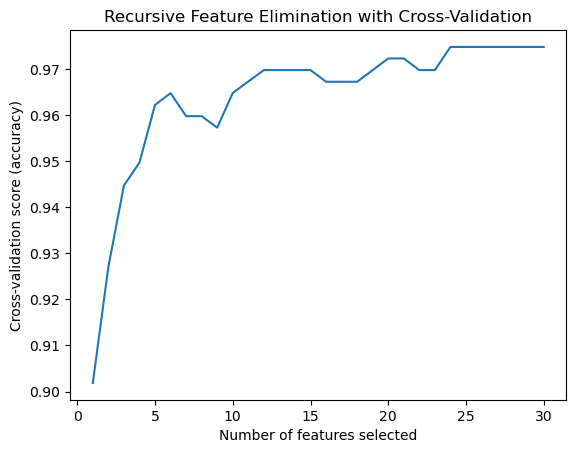

Selected features:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean compactness' 'mean concavity' 'mean concave points' 'mean symmetry'
 'radius error' 'perimeter error' 'area error' 'smoothness error'
 'compactness error' 'concave points error' 'symmetry error'
 'fractal dimension error' 'worst radius' 'worst texture'
 'worst perimeter' 'worst area' 'worst smoothness' 'worst concavity'
 'worst concave points' 'worst symmetry']
Test accuracy: 0.9766081871345029


In [23]:
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt

# Using RFECV to select features and perform cross-validation
rfecv = RFECV(estimator=model, step=1, cv=5, scoring='accuracy')
rfecv.fit(X_train_scaled, y_train)

# Plotting the number of features vs. cross-validation scores
plt.figure()
plt.title('Recursive Feature Elimination with Cross-Validation')
plt.xlabel('Number of features selected')
plt.ylabel('Cross-validation score (accuracy)')
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), 
         rfecv.cv_results_['mean_test_score'])
plt.show()

selected_features = rfecv.support_

# Printing the selected feature indices and their corresponding names
selected_indices = [i for i, val in enumerate(selected_features) if val]
selected_feature_names = data.feature_names[selected_indices]
print("Selected features:")
print(selected_feature_names)

# Training the model
model.fit(X_train_scaled[:, selected_indices], y_train)

# Evaluating the model
accuracy = model.score(X_test_scaled[:, selected_indices], y_test)
print("Test accuracy:", accuracy)


In [27]:
# Now let us find the best two features for the reduced feature model
selected_indices = [i for i, val in enumerate(rfecv.support_) if val]
cv_scores = rfecv.cv_results_
feature_cv_scores = dict(zip(selected_indices, cv_scores))
sorted_features = sorted(feature_cv_scores.items(), key=lambda x: x[1], reverse=True)

# Selecting the top two features with the highest cross-validation scores
best_features = sorted_features[:2]
best_feature_indices = [idx for idx, _ in best_features]
best_feature_names = data.feature_names[best_feature_indices]

print("Best two features for classification:")
print(best_feature_names)


Best two features for classification:
['mean texture' 'mean concave points']


In [40]:
best_feature_indices = [1, 7]  # Indices of "mean texture" and "mean concave points"
X_train_best = X_train_scaled[:, best_feature_indices]
X_test_best = X_test_scaled[:, best_feature_indices]

# Training the model using only the best two features
model.fit(X_train_best, y_train)

# Evaluating the model finally
accuracy = model.score(X_test_best, y_test)
print("Test accuracy:", accuracy)

from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Test accuracy: 0.9181286549707602
Precision: 0.9906542056074766
Recall: 0.9814814814814815
F1-score: 0.986046511627907

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98        63
           1       0.99      0.98      0.99       108

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171


Confusion Matrix:
[[ 62   1]
 [  2 106]]


### The best features I got was mean texture and mean concave points
### The test accuracy was 91.8%

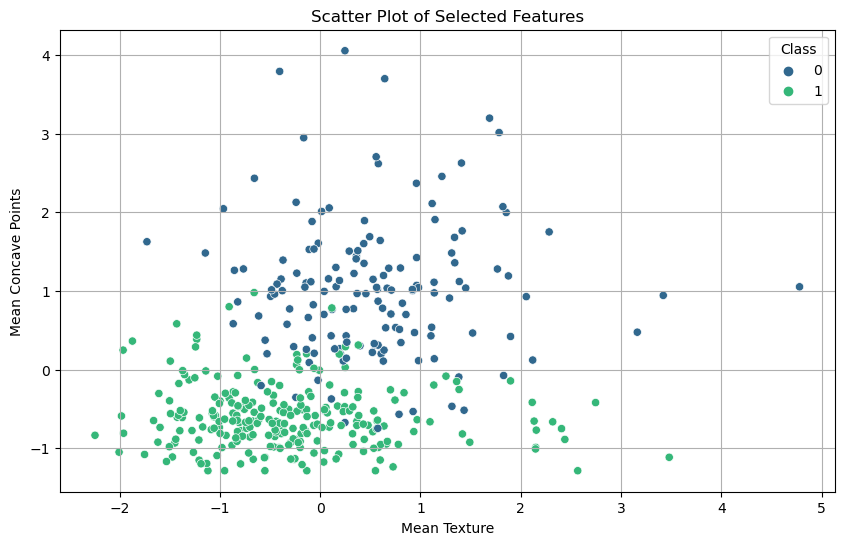

In [38]:
import pandas as pd
import seaborn as sns

# Create a DataFrame with the best features
selected_features_df = pd.DataFrame(X_train_best[:, [0, 1]], columns=['Mean Texture', 'Mean Concave Points'])
selected_features_df['Class'] = y_train

# Plot the selected features using a scatter plot with seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=selected_features_df, x='Mean Texture', y='Mean Concave Points', hue='Class', palette='viridis', alpha=1)
plt.title('Scatter Plot of Selected Features')
plt.grid(True)
plt.show()

